
# Project: Analysis on the Top five leagues in europe!
# Dataset used: The soccer database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> to do the analysis on the top five leagues in europe I used the soccer database, and the questions we're going to be asking are what's the most attacking and definsive leagues also what's the best team in those leagues.
> when we talk about the best team we're talking about two factors, the best scoring team and also the best team that has more clean sheets in their matches

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
db = sqlite3.connect('database.sqlite')
df = pd.read_sql_query('select * from Match',db)
df_country = pd.read_sql_query('select * from Country',db)
df_team = pd.read_sql_query('select * from Team',db)
df_team_attributes = pd.read_sql_query('select * from Team_Attributes',db)
df_players = pd.read_sql_query('select * from Player',db)
df_player_attributes = pd.read_sql_query('select * from Player_Attributes',db)
df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Data Cleaning 

In [5]:
#now we need to clean our matches dataset but first we need to eliminate all the columns that we're not interested in
# in the matches dataset we're interested in ('country_id','league_id','season','date','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal')
# we have to include these ids as foreign keys and then replace them with the correspoding columns that we want in the primary key table with a join
df = df[['country_id','league_id','season','date','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
df.head()

,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,2008-08-17 00:00:00,9987,9993,1,1
1,1,1,2008/2009,2008-08-16 00:00:00,10000,9994,0,0
2,1,1,2008/2009,2008-08-16 00:00:00,9984,8635,0,3
3,1,1,2008/2009,2008-08-17 00:00:00,9991,9998,5,0
4,1,1,2008/2009,2008-08-16 00:00:00,7947,9985,1,3


In [41]:
#making sure there is no duplicated matches
df.duplicated().sum()

0

In [45]:
#making sure there is no missing values
df.isnull().all()

season              False
date                False
home_team_goal      False
away_team_goal      False
home_team_name      False
away_team_name      False
country_name        False
home_team_status    False
away_team_status    False
dtype: bool

In [6]:
# now we have to get the teams names, country name and add a few columns to help us with the analysis
#let's start with the join statement from the teams table to include the home and away team name
df['home_team_name'] = pd.merge(df,df_team,how='left',left_on='home_team_api_id',right_on='team_api_id')['team_long_name']
df['away_team_name'] = pd.merge(df,df_team,how='left',left_on='away_team_api_id',right_on='team_api_id')['team_long_name']

In [8]:
# we now need to add the country name to know which league is each match from
df['country_name'] = pd.merge(df,df_country,how='left',left_on='country_id',right_on='id')['name']
#let's get a look on the data
df.head()

,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name,country_name
0,1,1,2008/2009,2008-08-17 00:00:00,9987,9993,1,1,KRC Genk,Beerschot AC,Belgium
1,1,1,2008/2009,2008-08-16 00:00:00,10000,9994,0,0,SV Zulte-Waregem,Sporting Lokeren,Belgium
2,1,1,2008/2009,2008-08-16 00:00:00,9984,8635,0,3,KSV Cercle Brugge,RSC Anderlecht,Belgium
3,1,1,2008/2009,2008-08-17 00:00:00,9991,9998,5,0,KAA Gent,RAEC Mons,Belgium
4,1,1,2008/2009,2008-08-16 00:00:00,7947,9985,1,3,FCV Dender EH,Standard de Liège,Belgium


In [10]:
#now let's drop all the id columns since we did our joins
df.drop(columns=['country_id','league_id','home_team_api_id','away_team_api_id'],inplace=True)
df.head()

,season,date,home_team_goal,away_team_goal,home_team_name,away_team_name,country_name
0,2008/2009,2008-08-17 00:00:00,1,1,KRC Genk,Beerschot AC,Belgium
1,2008/2009,2008-08-16 00:00:00,0,0,SV Zulte-Waregem,Sporting Lokeren,Belgium
2,2008/2009,2008-08-16 00:00:00,0,3,KSV Cercle Brugge,RSC Anderlecht,Belgium
3,2008/2009,2008-08-17 00:00:00,5,0,KAA Gent,RAEC Mons,Belgium
4,2008/2009,2008-08-16 00:00:00,1,3,FCV Dender EH,Standard de Liège,Belgium


In [14]:
# this function is responsible for telling us whether the home team had won the match or not
def home_status( home_goals,away_goals):
    if home_goals > away_goals:
        return 'win'
    elif home_goals < away_goals:
        return 'loss'
    else:
        return 'draw'

In [16]:
# this function is responsible for telling us whether the away team had won the match or not
def away_status(home):
    if home=='win':
        return 'loss'
    elif home=='loss':
        return 'win'
    else:
        return 'draw'

In [18]:
df["home_team_status"] = df.apply(lambda row:home_status(row["home_team_goal"], row["away_team_goal"]), axis=1)
df["away_team_status"] = df.apply(lambda row:away_status(row["home_team_status"]), axis=1)
df.head()

,season,date,home_team_goal,away_team_goal,home_team_name,away_team_name,country_name,home_team_status,away_team_status
0,2008/2009,2008-08-17,1,1,KRC Genk,Beerschot AC,Belgium,draw,draw
1,2008/2009,2008-08-16,0,0,SV Zulte-Waregem,Sporting Lokeren,Belgium,draw,draw
2,2008/2009,2008-08-16,0,3,KSV Cercle Brugge,RSC Anderlecht,Belgium,loss,win
3,2008/2009,2008-08-17,5,0,KAA Gent,RAEC Mons,Belgium,win,loss
4,2008/2009,2008-08-16,1,3,FCV Dender EH,Standard de Liège,Belgium,loss,win


In [19]:
#let's take a look about the data info to get a sense of our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            25979 non-null  object        
 1   date              25979 non-null  datetime64[ns]
 2   home_team_goal    25979 non-null  int64         
 3   away_team_goal    25979 non-null  int64         
 4   home_team_name    25979 non-null  object        
 5   away_team_name    25979 non-null  object        
 6   country_name      25979 non-null  object        
 7   home_team_status  25979 non-null  object        
 8   away_team_status  25979 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.8+ MB


In [12]:
# I notice that the date is a string so we need to convert it to be datetime object
df['date']=pd.to_datetime(df['date'])

In [13]:
# now these are the leagues we're going to do the analysis on since these are the top ranked five leagues in europe
spanish_league = df['country_name']=='Spain'
english_league = df['country_name']=='England'
italian_league = df['country_name']=='Italy'
german_league = df['country_name']=='Germany'
french_league = df['country_name']=='France'

<a id='eda'></a>
## Exploratory Data Analysis

### what's the most attacking league over the seasons?

In [20]:
#querying the home and away goals grouped by the country name so it's and indication of the league
league_goals = df.query("country_name in ['Spain','Italy','England','Germany','France']").groupby('country_name').sum()[['home_team_goal','away_team_goal']]
#adding a new column of total goals of eaach league
league_goals['total'] = league_goals['home_team_goal']+league_goals['away_team_goal']
league_goals

,home_team_goal,away_team_goal,total
country_name,,,
England,4715,3525,8240
France,4265,3162,7427
Germany,3982,3121,7103
Italy,4528,3367,7895
Spain,4959,3453,8412


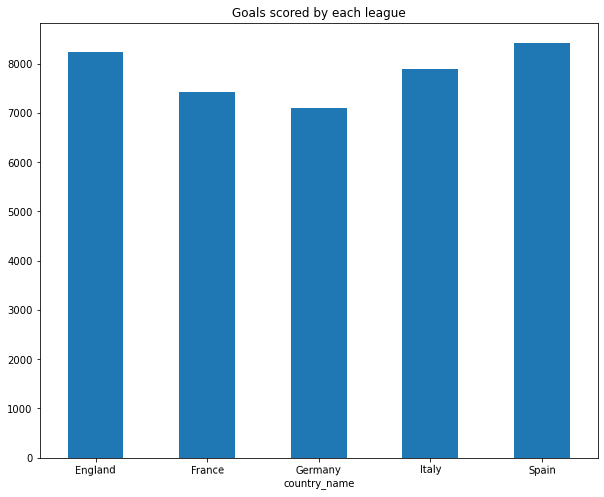

In [21]:
#plotting the total goals of each league to see which league had the most and less goals
#rot=1 so we get the names on the x-axis in the right direction
league_goals['total'].plot(kind='bar',figsize=(10,8),rot=1);
plt.title('Goals scored by each league');

>we see here the top scoring league is the spanish league with a total of **8412** goals and england comes in second place with **8240** goals, we also notice here that the most defensive league is the german league

>giving here that the **English** and the **Spanish** leagues are similar to each other with the most goals scored we need to take a look at their records against each other over all the seasons we got from the season of 2009 till 2016

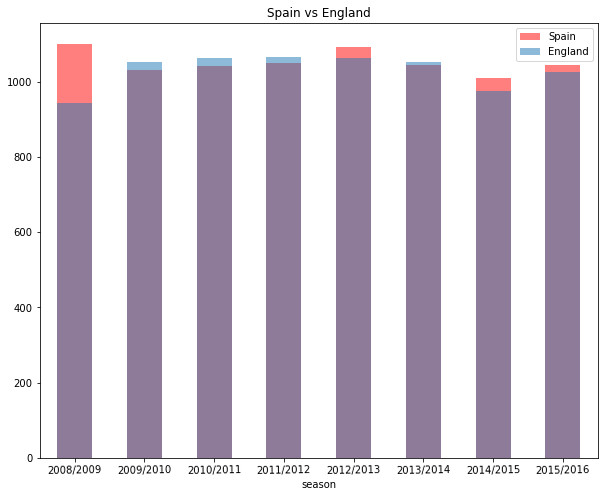

In [22]:
# querying all goals scored in only the spanish and english leagues grouped by the season and the name
league_goals = df.query("country_name in ['Spain','England']").groupby(['season','country_name']).sum()[['home_team_goal','away_team_goal']]
league_goals['total'] = league_goals['home_team_goal']+league_goals['away_team_goal']
total_goals = league_goals['total']
#ploting each league on top of the other so we can take a glance about which one leads in every season
total_goals.loc[:,'Spain'].plot(kind='bar',figsize=(10,8),color='red',alpha=0.5,rot=1);
total_goals.loc[:,'England'].plot(kind='bar',figsize=(10,8),alpha=0.5,rot=1);
plt.legend(['Spain','England']);
plt.title('Spain vs England');

> we see here that both leagues had 4 seasons each where they led in goals, but as we found out that the overall total goals are in spain's side.

### What's the best team in europe top five leagues?
### in order to answer that question we'll decompose it into two smaller questions

> <ul>
    <li>what's the best scoring team?</li>
    <li>what's the team with the most clean sheets?</li>
</ul>

## what's the best scoring team?
### to answer that question it's logical to search in the spanish league since we figured out it's the best attacking league in europe

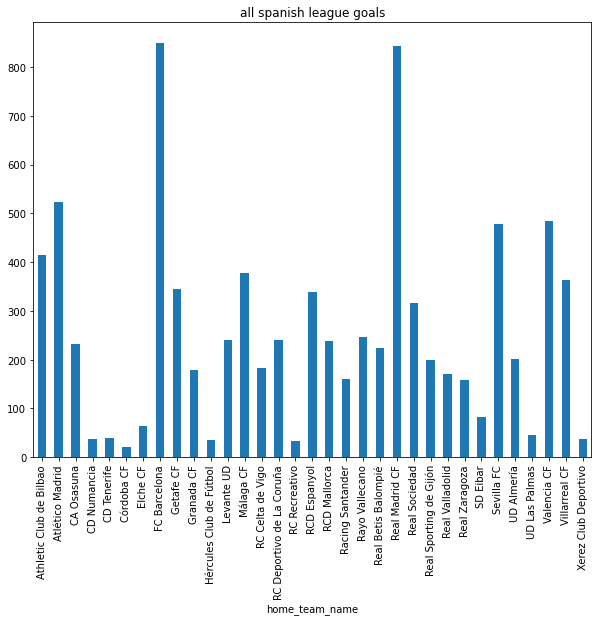

In [23]:
#ploting all the goals scored grouped by each team home and away
all_spanish_goals=df[spanish_league].groupby('home_team_name')['home_team_goal'].sum()+df[spanish_league].groupby('away_team_name')['away_team_goal'].sum()
all_spanish_goals.plot(kind='bar',figsize=(10,8),title='all spanish league goals');

>so as we can see FC Barcelona and Real Madrid are both the top domimant goal scorers in spain. therefore, it would be really helpful to look at their goal record in each season

In [25]:
#querying all barcelona goals
barcelona_goals_home=df[spanish_league].query('home_team_name == "FC Barcelona"').groupby('season')['home_team_goal'].sum()
barcelona_goals_away=df[spanish_league].query('away_team_name == "FC Barcelona"').groupby('season')['away_team_goal'].sum()
barcelona_total_goals = barcelona_goals_away + barcelona_goals_home

In [26]:
#querying all real madrid goals
madrid_goals_home=df[spanish_league].query('home_team_name == "Real Madrid CF"').groupby('season')['home_team_goal'].sum()
madrid_goals_away=df[spanish_league].query('away_team_name == "Real Madrid CF"').groupby('season')['away_team_goal'].sum()
madrid_total_goals = madrid_goals_away + madrid_goals_home

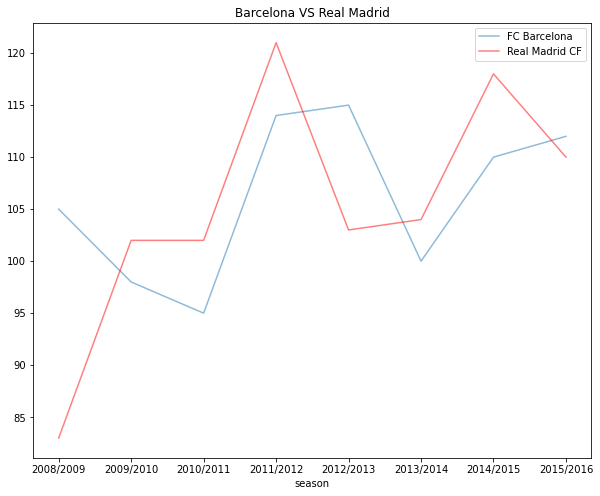

In [27]:
#ploting goals of barcelona and real madird on the season time frame
barcelona_total_goals.plot(kind='line',figsize=(10,8),alpha=0.5)
madrid_total_goals.plot(kind='line',figsize=(10,8),color='red',alpha=0.5)
plt.legend(['FC Barcelona','Real Madrid CF'])
plt.title('Barcelona VS Real Madrid');

> As we can see Real Madrid reached the highest record between them in the season 2011/2012 but after that their goals record droped to barcelona
> but it's still not so clear what team to choose between them as the best so we will go search their **head to head** games

# Barcelona VS Real Madrid (El clásico!)
> we would be looking at the goals, wins and clean sheets between them

In [28]:
#querying only matches between both of them
df_clasico = df[spanish_league].query('(home_team_name=="FC Barcelona" and away_team_name=="Real Madrid CF") or (home_team_name=="Real Madrid CF"and away_team_name=="FC Barcelona")')

In [29]:
#making a new column with barcelona performance so it is easy to plot their result.
df_clasico['barcelona'] = df_clasico.apply(lambda row: row['home_team_status'] if row['home_team_name']=='FC Barcelona' else row['away_team_status'],axis=1)

Text(0.5, 1.0, 'Barcelona performance against real madrid')

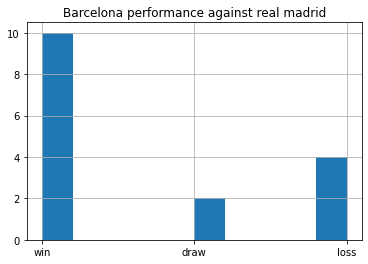

In [30]:
#plotting barcelona performance vs real madrid 
df_clasico['barcelona'].hist()
plt.title('Barcelona performance against real madrid')

> we can see here that FC Barcelona are ahead of real madrid when it comes to head to head matches so we can finally make a conclusion that barcelona's side was the better one.

### What's the team with the most clean sheets?

> as this was our second question now we need to look at most clean sheets made by a team in europe.
> for this statistic we're going to be looking at the **german league** as we figured out earlier that it's the least scoring league in europe top five leagues

In [31]:
##taking a look at the german league
df[german_league].head()

,season,date,home_team_goal,away_team_goal,home_team_name,away_team_name,country_name,home_team_status,away_team_status
7808,2008/2009,2008-08-15,2,2,FC Bayern Munich,Hamburger SV,Germany,draw,draw
7809,2008/2009,2008-08-16,2,3,Bayer 04 Leverkusen,Borussia Dortmund,Germany,loss,win
7810,2008/2009,2008-08-16,3,0,FC Schalke 04,Hannover 96,Germany,win,loss
7811,2008/2009,2008-08-16,2,1,VfL Wolfsburg,1. FC Köln,Germany,win,loss
7812,2008/2009,2008-08-17,0,2,Eintracht Frankfurt,Hertha BSC Berlin,Germany,loss,win


In [32]:
# making a dataframe with matches that ended with a clean sheet for one of the teams or both of them 
df_clean_sheet= df[german_league].query('home_team_goal == 0 or away_team_goal==0')
df_clean_sheet.head()

,season,date,home_team_goal,away_team_goal,home_team_name,away_team_name,country_name,home_team_status,away_team_status
7810,2008/2009,2008-08-16,3,0,FC Schalke 04,Hannover 96,Germany,win,loss
7812,2008/2009,2008-08-17,0,2,Eintracht Frankfurt,Hertha BSC Berlin,Germany,loss,win
7814,2008/2009,2008-08-16,0,3,FC Energie Cottbus,TSG 1899 Hoffenheim,Germany,loss,win
7816,2008/2009,2008-08-16,1,0,Karlsruher SC,VfL Bochum,Germany,win,loss
7817,2008/2009,2008-10-29,2,0,Hamburger SV,VfB Stuttgart,Germany,win,loss


In [33]:
# adding columns to indicate whether the clean sheet is made by the home or away team (1 is clean sheet, 0 not a clean sheet)
df_clean_sheet['home_clean']=df_clean_sheet.apply(lambda row: 1 if row['away_team_goal']==0 else 0 ,axis=1)
df_clean_sheet['away_clean']=df_clean_sheet.apply(lambda row: 1 if row['home_team_goal']==0 else 0 ,axis=1)

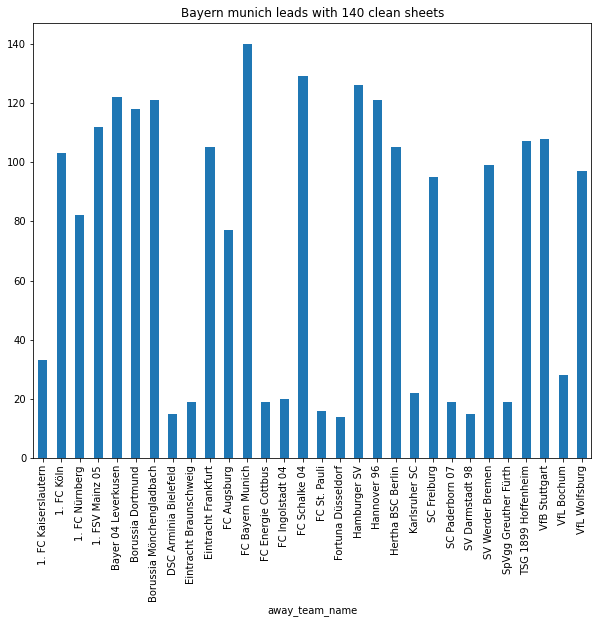

In [40]:
#summing all the home and away clean sheets made by each team
all_clean_sheets = df_clean_sheet.groupby('away_team_name').count()['away_clean'] + df_clean_sheet.groupby('home_team_name').count()['home_clean']
#ploting the total result to see the team with most clean sheets
all_clean_sheets.plot(kind='bar',figsize=(10,8));
plt.title('Bayern munich leads with 140 clean sheets');

>Now it's clear that bayern is the most defensive team with **140** clean sheets made over all seasons

<a id='conclusions'></a>
## Conclusions

>### we could say that during the time period of 2009 until 2016 the most attacking league was the spanish league and the most defensive league was the german league.
>### we also found out when we mention the best team we must talk about barcelona and real madrid, whom we found were leading the top scorers in europe top five leagues, and we knew that barcelona was the leading team in the head to head matches between them
> ### when we considered the top defensive team or the most team with clean sheets in europe we found out that the german giants bayern munich had the most clean sheets record.